In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv("sales_data_sample.csv", encoding="latin")

In [3]:
# Selecting relevant columns for clustering
df = df[['ORDERLINENUMBER', 'SALES']]

In [4]:
# Feature scaling
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df.values)

In [5]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_values)
    wcss.append(kmeans.inertia_)

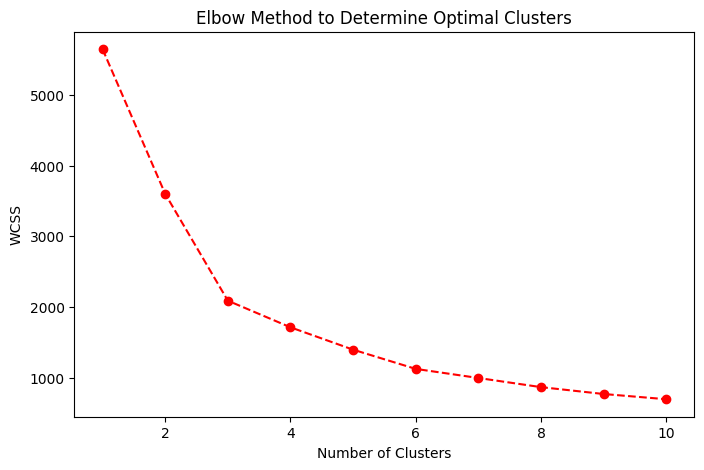

In [6]:
# Plot the Elbow graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='r')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
# Fit K-Means with chosen number of clusters (e.g., 7 from elbow method)
optimal_clusters = 7
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_values)

In [8]:
# Display cluster assignments
print(df.head())

   ORDERLINENUMBER    SALES  cluster
0                2  2871.00        6
1                5  2765.90        6
2                2  3884.34        0
3                6  3746.70        0
4               14  5205.27        1


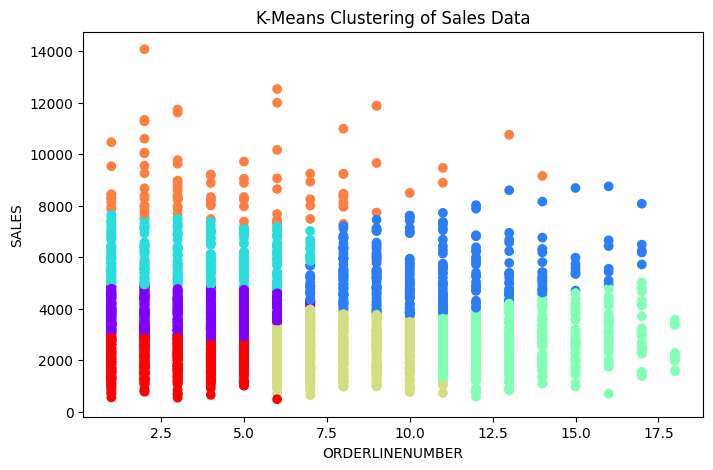

In [9]:
# Visualize the clusters
plt.figure(figsize=(8,5))
plt.scatter(df['ORDERLINENUMBER'], df['SALES'], c=df['cluster'], cmap='rainbow')
plt.title('K-Means Clustering of Sales Data')
plt.xlabel('ORDERLINENUMBER')
plt.ylabel('SALES')
plt.show()

In [10]:
# Inertia (WCSS) of the final clustering
print(f"WCSS (Inertia) for {optimal_clusters} clusters: {kmeans.inertia_}")

WCSS (Inertia) for 7 clusters: 993.4917709196752
